<a href="https://colab.research.google.com/github/vgnesh/FraudDetector/blob/master/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files
files.upload()

In [0]:
os.environ['KAGGLE_USERNAME'] = ""
os.environ['KAGGLE_KEY'] = ""
!kaggle competitions download -c ieee-fraud-detection

In [0]:
from zipfile import ZipFile

zf = ZipFile('train_transaction.csv.zip', 'r')
zf.extractall()
zf.close()

zf = ZipFile('train_identity.csv.zip', 'r')
zf.extractall()
zf.close()

zf = ZipFile('test_transaction.csv.zip', 'r')
zf.extractall()
zf.close()

zf = ZipFile('test_identity.csv.zip', 'r')
zf.extractall()
zf.close()

In [0]:
df_train_trans = pd.read_csv('train_transaction.csv')
df_train_identity = pd.read_csv('train_identity.csv')

In [0]:
df_train = pd.merge(df_train_trans, df_train_identity, on = 'TransactionID', how = 'left')

In [0]:
df_test_trans = pd.read_csv('test_transaction.csv')
df_test_identity = pd.read_csv('test_identity.csv')

In [0]:
df_test = pd.merge(df_test_trans, df_test_identity, on = 'TransactionID', how = 'left')

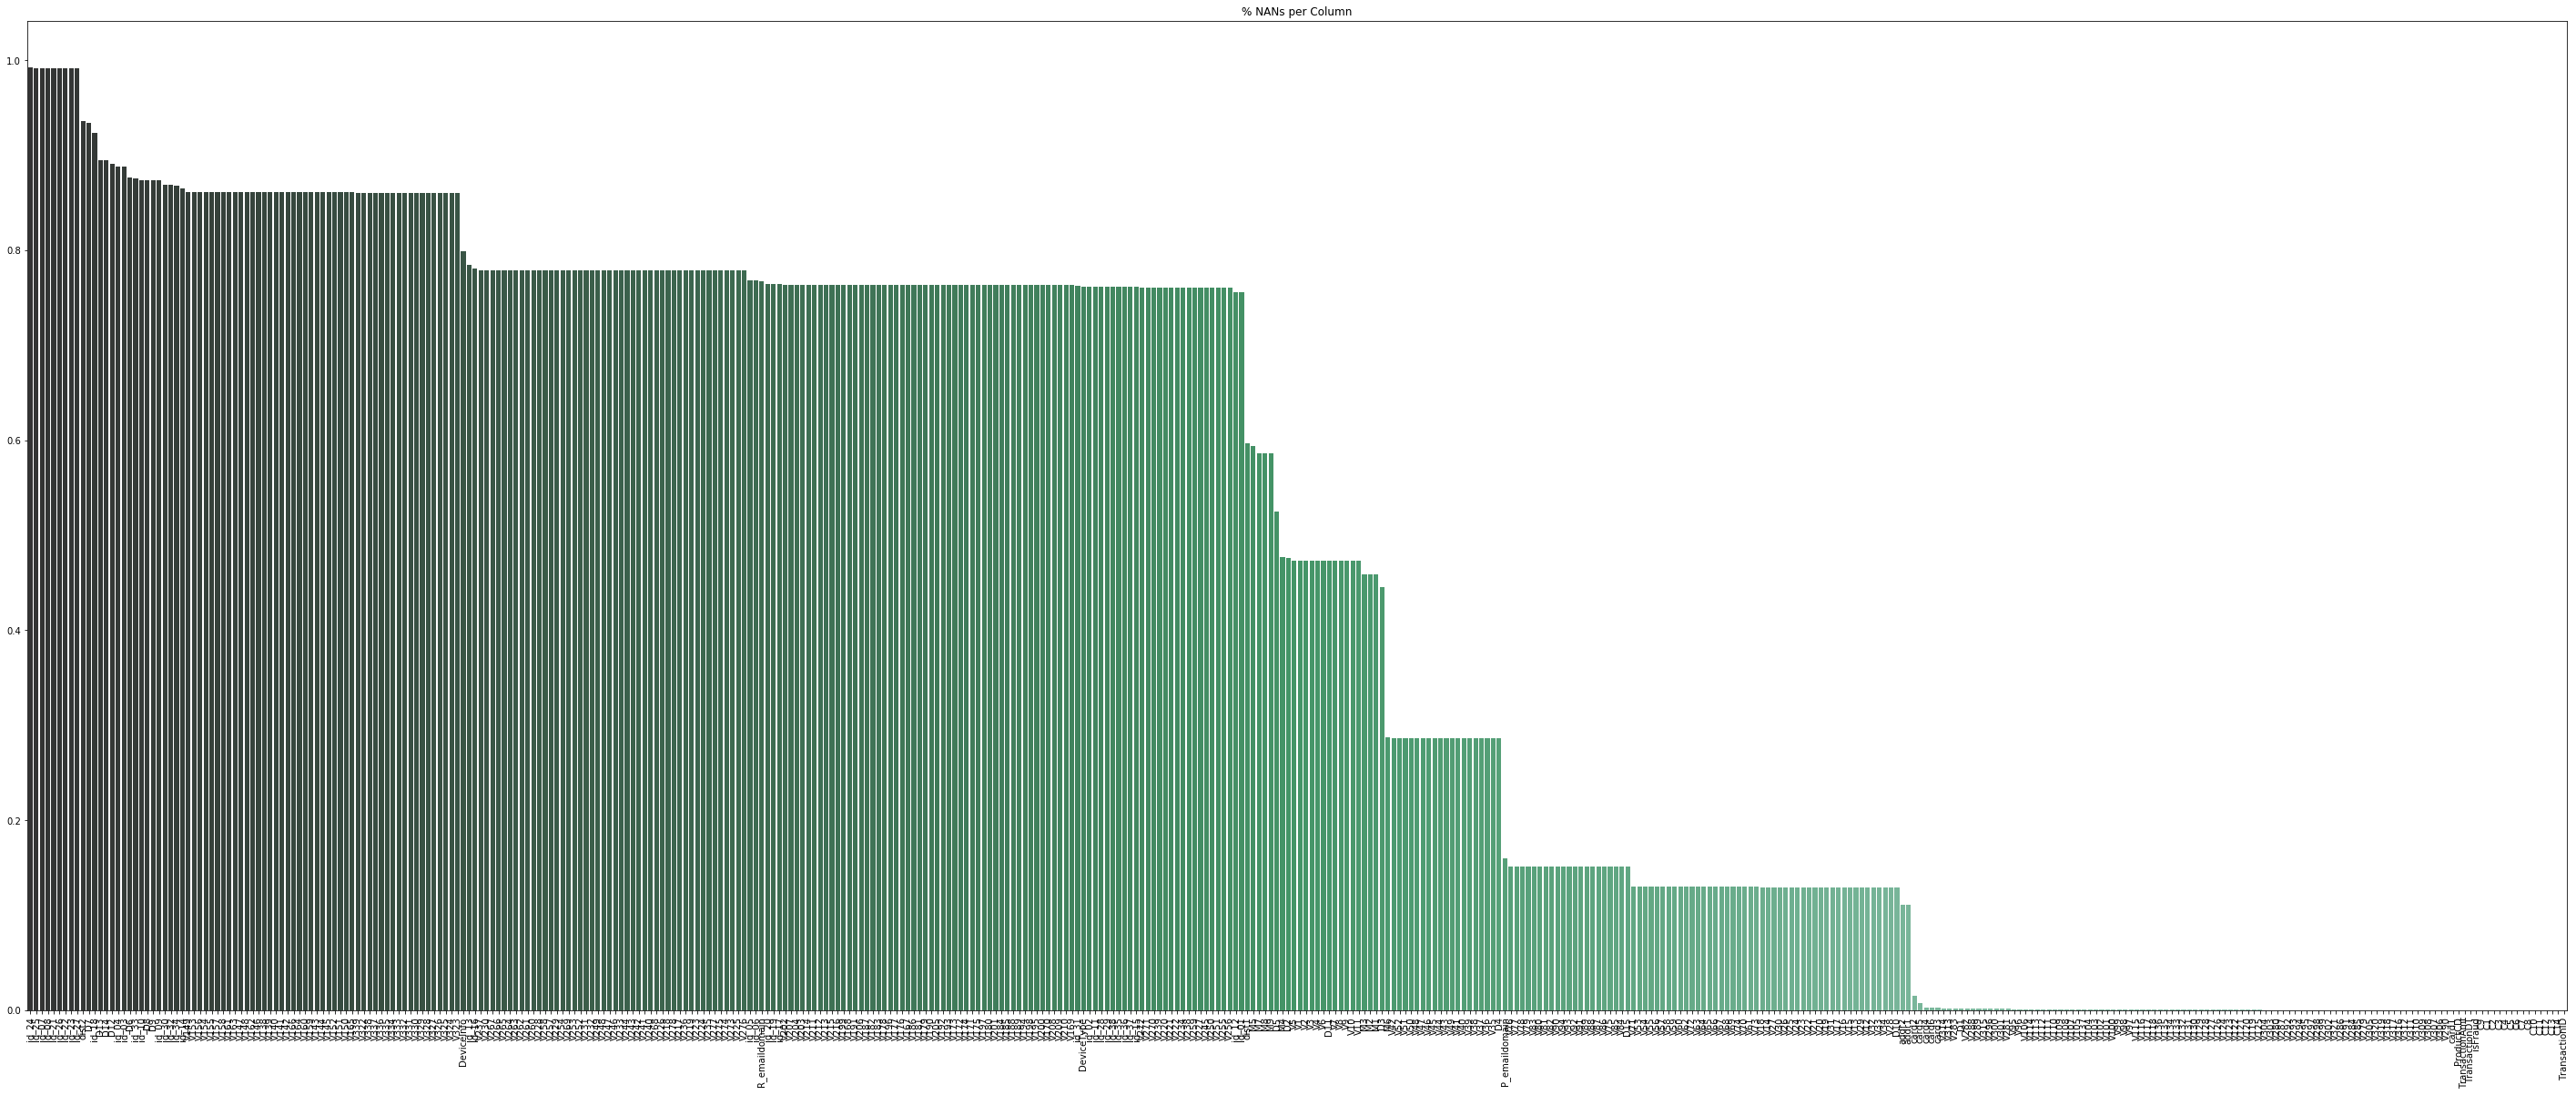

In [9]:
def visualize(X, Y, color):
  plt.figure(figsize = (50,20))
  sns.barplot(x = X, 
              y = Y,
              palette = color)
  plt.title('% NANs per Column')
  plt.xticks(rotation = 90)

  #Visualizing NANs % per Column
X = df_train.isnull().sum().sort_values(ascending = False).index
Y = df_train.isnull().sum().sort_values(ascending = False)/len(df_train)
color = "BuGn_d"
visualize(X, Y, color)

In [0]:
df_cols_nans_count = df_train.isnull().sum().sort_values(ascending = False)
df_cols_nans_per = df_cols_nans_count/len(df_train)
df_cols_nans = pd.DataFrame({"nans_count" : df_cols_nans_count, "nans_%" : df_cols_nans_per})

In [0]:
limiter = 0.2
discarded_cols = df_cols_nans[df_cols_nans['nans_%'] > limiter].index
df_train = df_train.drop(columns = discarded_cols)

In [0]:
def encoding_categoricals(df):
  categorical_features = df.select_dtypes(include=[object])
  encoded_categorical_features = pd.get_dummies(categorical_features)
  df = df.drop(columns = categorical_features)
  df = pd.concat([df, encoded_categorical_features], axis = 1)
  return df

def fill_nans(df):
  df = df.fillna(df.mode())
  df = df.dropna()
  return df

df_train = encoding_categoricals(df_train)
df_train = fill_nans(df_train)

In [0]:
X_train = df_train[df_train.columns.difference(['isFraud'])]
y_train = df_train['isFraud']

In [0]:
df_test = df_test.drop(columns = discarded_cols)

In [0]:
df_test = encoding_categoricals(df_test)
df_test = fill_nans(df_test)

In [0]:
X_test = df_test[df_test.columns.difference(['isFraud'])]

In [18]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(solver = 'lbfgs')
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
regressor.score(X_train, y_train)

0.9795922220570152